In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import subprocess
from scipy.stats import chisquare
import os
import protfasta
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
d_domains = "../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files if f !='.ipynb_checkpoints']

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")

In [40]:
# Below 0.01%
rare_output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 0.01 / 100, domain_types = ["AD"], print_output = False)
rare_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], rare_output)
rare_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop
0,ARNT2,Q9HBZ2,2154,206,0.095636,582,47,0.080756
1,ARX,Q96QS3,1689,141,0.083481,273,20,0.073260
2,CASZ1,Q86V15,5280,677,0.128220,465,76,0.163441
3,CC2D1A,Q6P1N0,2856,389,0.136204,117,12,0.102564
4,CAMTA2,O94983,3609,422,0.116930,882,99,0.112245
5,EBF3,Q9H4W6,1791,134,0.074819,240,17,0.070833
6,EGR3,Q06889,1164,95,0.081615,606,59,0.097360
7,ESR2,Q92731,1593,196,0.123038,1035,117,0.113043
8,GLIS1,Q8NBF1,1863,276,0.148148,522,73,0.139847
9,ERG,P11308,1440,126,0.087500,573,52,0.090750


In [41]:
# Between 0.01% and 0.1%
uncommon_output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0.01 / 100, 0.1 / 100, domain_types = ["AD"], print_output = False)
uncommon_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], uncommon_output)
uncommon_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop
0,ARNT2,Q9HBZ2,2154,8,0.003714,582,0,0.000000
1,ARX,Q96QS3,1689,5,0.002960,273,0,0.000000
2,CASZ1,Q86V15,5280,44,0.008333,465,8,0.017204
3,CC2D1A,Q6P1N0,2856,37,0.012955,117,1,0.008547
4,CAMTA2,O94983,3609,20,0.005542,882,6,0.006803
5,EBF3,Q9H4W6,1791,4,0.002233,240,0,0.000000
6,EGR3,Q06889,1164,6,0.005155,606,2,0.003300
7,ESR2,Q92731,1593,12,0.007533,1035,9,0.008696
8,GLIS1,Q8NBF1,1863,17,0.009125,522,1,0.001916
9,ERG,P11308,1440,2,0.001389,573,2,0.003490


In [42]:
# Above 0.1%
common_output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0.1 / 100, 1, domain_types = ["AD"], print_output = False)
common_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], common_output)
common_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop
0,ARNT2,Q9HBZ2,2154,3,0.001393,582,2,0.003436
1,ARX,Q96QS3,1689,0,0.000000,273,0,0.000000
2,CASZ1,Q86V15,5280,13,0.002462,465,3,0.006452
3,CC2D1A,Q6P1N0,2856,9,0.003151,117,0,0.000000
4,CAMTA2,O94983,3609,7,0.001940,882,3,0.003401
5,EBF3,Q9H4W6,1791,0,0.000000,240,0,0.000000
6,EGR3,Q06889,1164,0,0.000000,606,0,0.000000
7,ESR2,Q92731,1593,1,0.000628,1035,0,0.000000
8,GLIS1,Q8NBF1,1863,10,0.005368,522,1,0.001916
9,ERG,P11308,1440,0,0.000000,573,0,0.000000


In [43]:
# Performing Fisher's exact test
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(rare_output, "AD")
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(uncommon_output, "AD")
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(common_output, "AD")

In [44]:
rare_output.sort_values("AD_missense", ascending = False)

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals
34,SRCAP,Q6ZRS2,9693,1236,0.127515,5712,707,0.123775,0.193637
10,HIVEP3,Q5T1R4,7221,888,0.122975,2592,318,0.122685,0.970218
7,ESR2,Q92731,1593,196,0.123038,1035,117,0.113043,0.109691
36,TCF20,Q9UGU0,5883,700,0.118987,981,115,0.117227,0.913964
21,NCOA1,Q15788,4326,467,0.107952,1230,109,0.088618,0.010611
4,CAMTA2,O94983,3609,422,0.116930,882,99,0.112245,0.673083
19,MTF1,Q14872,2262,204,0.090186,891,92,0.103255,0.084263
22,NFE2L3,Q9Y4A8,2085,322,0.154436,600,91,0.151667,0.841198
25,NR1D1,P20393,1845,202,0.109485,834,81,0.097122,0.134115
2,CASZ1,Q86V15,5280,677,0.128220,465,76,0.163441,0.020024


In [45]:
rare_output_bh_decisions = Variant_analysis_helper_functions.benjamini_hochberg(rare_output["ADvsTF_fisher_exact_p_vals"], 0.1)
rare_output_bh_sig = rare_output[rare_output_bh_decisions]
rare_output_bh_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals
2,CASZ1,Q86V15,5280,677,0.128220,465,76,0.163441,0.020024
11,IKZF1,Q13422,1560,155,0.099359,246,35,0.142276,0.019633
17,MEIS2,O14770,1434,129,0.089958,414,59,0.142512,0.000024
21,NCOA1,Q15788,4326,467,0.107952,1230,109,0.088618,0.010611
26,NR4A2,P43354,1797,154,0.085698,318,16,0.050314,0.011017
27,NKX2-2,O95096,822,105,0.127737,162,31,0.191358,0.008673
32,RORA,P35398,1572,136,0.086514,342,14,0.040936,0.000446
38,TCF7L2,Q9NQB0,1860,184,0.098925,300,16,0.053333,0.002966
42,YY1,P25490,1245,78,0.062651,288,28,0.097222,0.008130


In [46]:
uncommon_output_bh_decisions = Variant_analysis_helper_functions.benjamini_hochberg(uncommon_output["ADvsTF_fisher_exact_p_vals"], 0.1)
uncommon_output_bh_sig = uncommon_output[uncommon_output_bh_decisions]
uncommon_output_bh_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals
17,MEIS2,O14770,1434,7,0.004881,414,7,0.016908,0.000161


In [47]:
common_output_bh_decisions = Variant_analysis_helper_functions.benjamini_hochberg(common_output["ADvsTF_fisher_exact_p_vals"], 0.1)
common_output_bh_sig = common_output[common_output_bh_decisions]
common_output_bh_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals


---
Which TFs have the most rare mutants?

In [49]:
pd.merge(SFARI_TFs[["uniprotID", "gene-symbol"]], rare_output, on = "uniprotID").sort_values("AD_missense", ascending = False)

,uniprotID,gene-symbol_x,gene-symbol_y,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals
34,Q6ZRS2,SRCAP,SRCAP,9693,1236,0.127515,5712,707,0.123775,0.193637
10,Q5T1R4,HIVEP3,HIVEP3,7221,888,0.122975,2592,318,0.122685,0.970218
7,Q92731,ESR2,ESR2,1593,196,0.123038,1035,117,0.113043,0.109691
36,Q9UGU0,TCF20,TCF20,5883,700,0.118987,981,115,0.117227,0.913964
21,Q15788,NCOA1,NCOA1,4326,467,0.107952,1230,109,0.088618,0.010611
4,O94983,CAMTA2,CAMTA2,3609,422,0.116930,882,99,0.112245,0.673083
19,Q14872,MTF1,MTF1,2262,204,0.090186,891,92,0.103255,0.084263
22,Q9Y4A8,NFE2L3,NFE2L3,2085,322,0.154436,600,91,0.151667,0.841198
25,P20393,NR1D1,NR1D1,1845,202,0.109485,834,81,0.097122,0.134115
2,Q86V15,CASZ1,CASZ1,5280,677,0.128220,465,76,0.163441,0.020024


Which TFs are significant for rare mutants?

In [51]:
pd.merge(SFARI_TFs[["uniprotID", "gene-symbol"]], rare_output_bh_sig, on = "uniprotID").sort_values("ADvsTF_fisher_exact_p_vals", ascending = True)

,uniprotID,gene-symbol_x,gene-symbol_y,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals
2,O14770,MEIS2,MEIS2,1434,129,0.089958,414,59,0.142512,0.000024
6,P35398,RORA,RORA,1572,136,0.086514,342,14,0.040936,0.000446
7,Q9NQB0,TCF7L2,TCF7L2,1860,184,0.098925,300,16,0.053333,0.002966
8,P25490,YY1,YY1,1245,78,0.062651,288,28,0.097222,0.008130
5,O95096,NKX2-2,NKX2-2,822,105,0.127737,162,31,0.191358,0.008673
3,Q15788,NCOA1,NCOA1,4326,467,0.107952,1230,109,0.088618,0.010611
4,P43354,NR4A2,NR4A2,1797,154,0.085698,318,16,0.050314,0.011017
1,Q13422,IKZF1,IKZF1,1560,155,0.099359,246,35,0.142276,0.019633
0,Q86V15,CASZ1,CASZ1,5280,677,0.128220,465,76,0.163441,0.020024


In [52]:
rare_output_bh_sig.sort_values("ADvsTF_fisher_exact_p_vals", ascending = True)[["gene-symbol", "uniprotID", "AD_missense_prop", "TF_missense_prop"]]

,gene-symbol,uniprotID,AD_missense_prop,TF_missense_prop
17,MEIS2,O14770,0.142512,0.089958
32,RORA,P35398,0.040936,0.086514
38,TCF7L2,Q9NQB0,0.053333,0.098925
42,YY1,P25490,0.097222,0.062651
27,NKX2-2,O95096,0.191358,0.127737
21,NCOA1,Q15788,0.088618,0.107952
26,NR4A2,P43354,0.050314,0.085698
11,IKZF1,Q13422,0.142276,0.099359
2,CASZ1,Q86V15,0.163441,0.128220


In [53]:
pd.merge(uncommon_output_bh_sig, SFARI_TFs[["uniprotID", "gene-symbol"]], on = "uniprotID").sort_values("ADvsTF_fisher_exact_p_vals", ascending = True)

,gene-symbol_x,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals,gene-symbol_y
0,MEIS2,O14770,1434,7,0.004881,414,7,0.016908,0.000161,MEIS2


In [54]:
pd.merge(common_output_bh_sig, SFARI_TFs[["uniprotID", "gene-symbol"]], on = "uniprotID").sort_values("ADvsTF_fisher_exact_p_vals", ascending = True)

,gene-symbol_x,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,ADvsTF_fisher_exact_p_vals,gene-symbol_y


Text(0.5, 1.0, 'Rare Variants Only (<= 0.1%)')

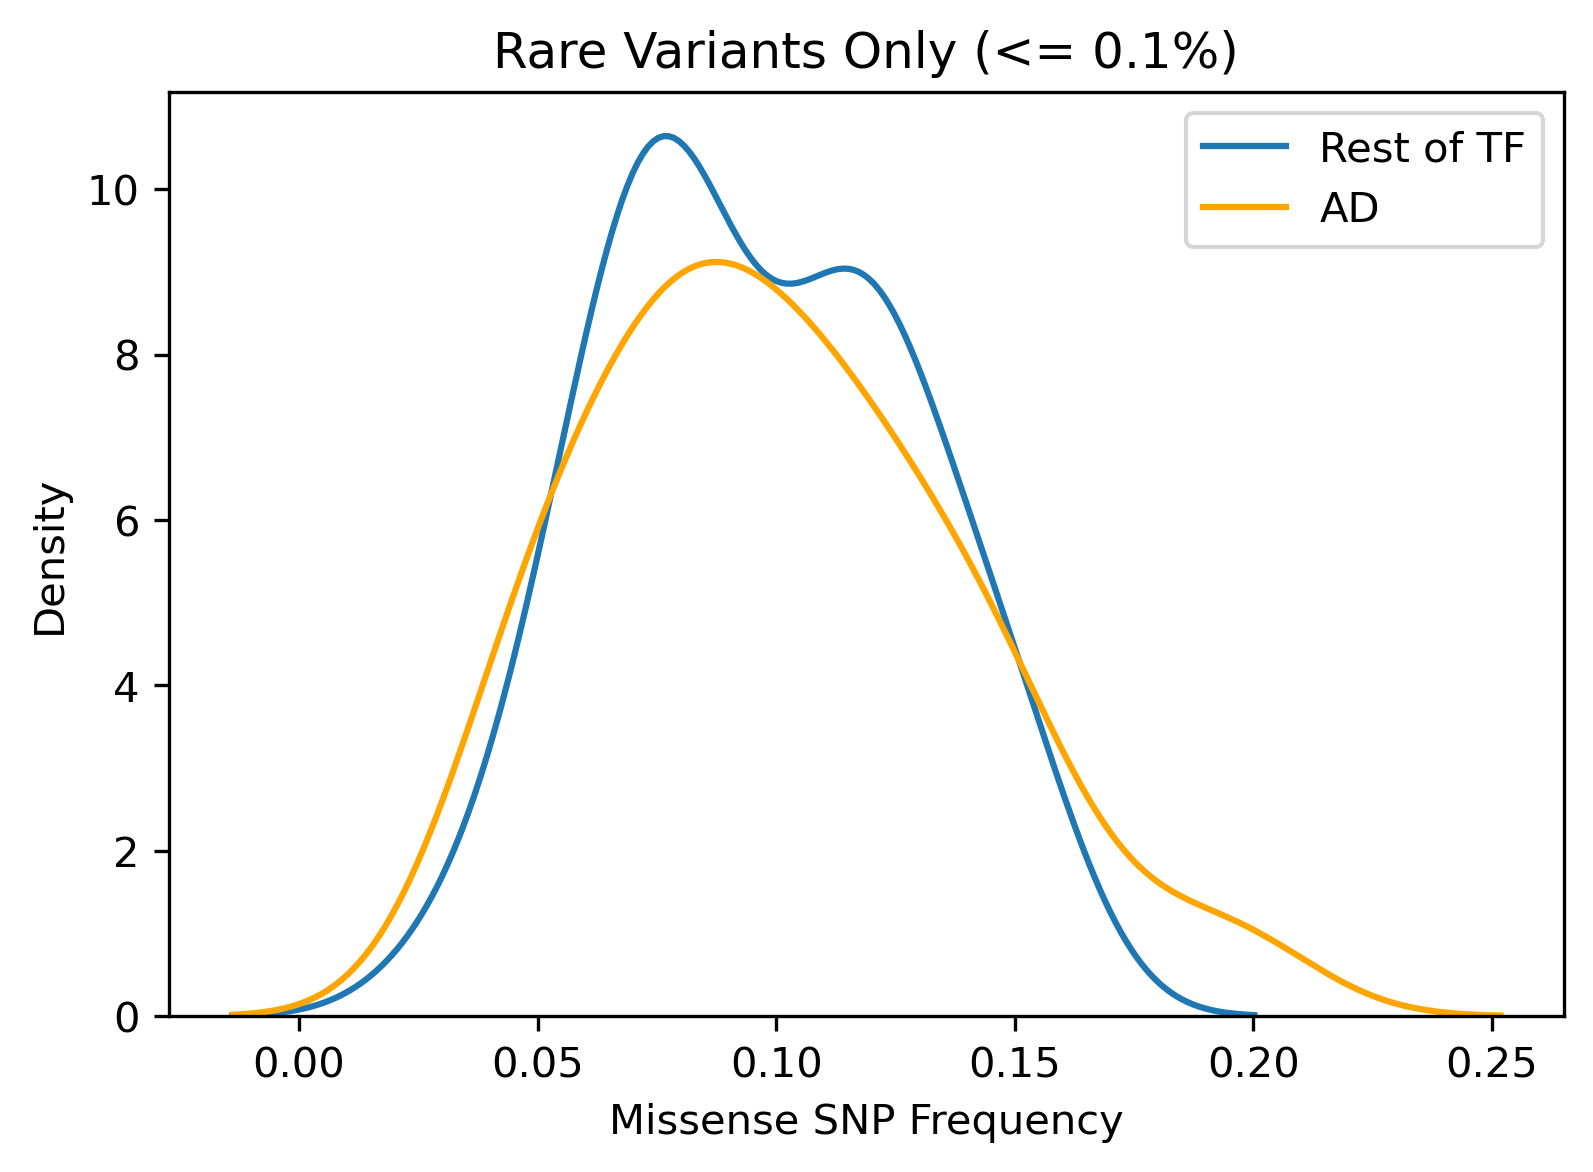

In [55]:
plt.figure(figsize = (6,4), dpi = 300);

rest_of_TF_prop = (rare_output["TF_missense"] - rare_output["AD_missense"]) \
/ (rare_output["TF_cds_length"] - rare_output["AD_cds_length"])
sns.kdeplot(rest_of_TF_prop, label = "Rest of TF");
sns.kdeplot(rare_output["AD_missense_prop"], color = "orange", label = "AD");

plt.legend()
plt.xlabel("Missense SNP Frequency")
plt.title("Rare Variants Only (<= 0.1%)")